In [261]:
import numpy as np
import matplotlib.pyplot as plt

In [270]:
print('targets and constraints')
N=5
FOV_target = 3 # in mm, 
DOF_target = 0.2 # in mm, 200um
Lambda_emission = 0.00051 # in nm, 510nm
size_of_neuron = 0.015 # in mm, 15um
sampling_factor = 2.5 # choose in pixels per cell, just a little higher than the Nyquist rate
resolution_target = size_of_neuron/sampling_factor# in mm, 5um is alternative
print(str(N) + ' Elemental images')
print('field of view target = ' + str(round(FOV_target,2)) + ' mm')
print('resolution target = ' + str(round(resolution_target*1000,2)) + ' um')
print('depth of field target = ' + str(DOF_target) + ' mm')
print('\n')

targets and constraints
5 Elemental images
field of view target = 3 mm
resolution target = 6.0 um
depth of field target = 0.2 mm




In [272]:
print('decide on camera parameters')
delta = 0.0026 # in mm, 2.6um
Mpix =  67
print('pixel size = ' + str(delta*1000) + ' um')
print('number of pixels = ' + str(Mpix) + ' Mpix')
print('\n')


decide on camera parameters
pixel size = 2.6 um
number of pixels = 67 Mpix




In [267]:
# calculations
sensor_size =  np.sqrt(Mpix*10**6)*delta # in mm
print('\nCamera: ' + str(Mpix) + ' Mpix, ' + str(delta) + ' um pixel size, ' + str(round(sensor_size,2)) + ' mm sensor size')

def pitch(sensor_size,N):
    P = sensor_size/N
    return P
P = pitch(sensor_size,N)
print('maximum MLA pitch = ' + str(round(P,3)) + ' mm')

def necessary_total_magnification(FOV_target,P):
    Mt = P/FOV_target
    return Mt
Mt = necessary_total_magnification(FOV_target,P)
print('necessary total magnification = x' + str(round(Mt,2)))

## base NA on resolution
def necessary_NAobj_given_res(Lambda_emission,resolution_target,Mt,delta):
    NAobj = Lambda_emission/(2*resolution_target-4*delta/Mt)
    return NAobj
NAobj_res=necessary_NAobj_given_res(Lambda_emission,resolution_target,Mt,delta)
print('\nnecessary objective NA based on res target of ' + str(round(resolution_target*1000,2)) + ' um = ' + str(round(NAobj_res,2)))

def depth_of_field(Lambda_emission,NAobj,delta,Mt):
    DOF = 2*Lambda_emission/(NAobj**2) + delta/(Mt*NAobj)
    return DOF
DOF = depth_of_field(Lambda_emission,NAobj_res,delta,Mt)
print('depth of field = ' + str(round(DOF,2)) + ' mm')

## base NA on DAF
def objective_NA_given_DOF(DOF,Lambda_emission,delta,Mt):
    NAobj = (np.sqrt(delta**2 + 8*DOF*Lambda_emission*Mt**2) - delta)/(2*DOF*Mt)
    return NAobj
NAobj_DOF = objective_NA_given_DOF(DOF_target,Lambda_emission,delta,Mt)
print('OR\nnecessary objective NA based on DOF target of ' + str(DOF_target) + ' mm = ' + str(round(NAobj_DOF,2)))

def resolution_given_NA(Lambda_emission,NAobj,delta,Mt):
    res = Lambda_emission/(2*NAobj) + 2*delta/Mt
    return res
resolution = resolution_given_NA(Lambda_emission,NAobj_DOF,delta,Mt)
print('Resolution = ' + str(round(resolution*1000,2)) + ' um')
print('\n')


Camera: 67 Mpix, 0.0026 um pixel size, 21.28 mm sensor size
ideal MLA pitch = 4.256 mm
necessary total magnification = x1.42

necessary objective NA based on res target of 6.0 um = 0.11
depth of field = 0.1 mm
OR
necessary objective NA based on DOF target of 0.2 mm = 0.07
Resolution = 7.47 um


In [273]:
print('find MLA with pitch as close to max as possible and enter pitch and fMLA')
fMLA = 39 # in mm
print('MLA pitch = ' + str(round(P,2)) + ' mm')
print('MLA focal length = ' + str(fMLA) + ' mm')


find MLA with pitch as close to max as possible and enter pitch and fMLA
MLA pitch = 4.26 mm
MLA focal length = 39 mm


necessary objective NA = 0.10921160628625944


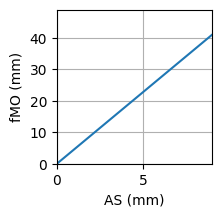

In [260]:
plot = False
if plot:
    print('necessary objective NA = ' + str(NAobj_res))
    AS_range = np.arange(0.01,10) # in mm, 
    fMO_range = np.arange(0.01,50) # in mm, Would this be the flange focal distance?

    def necessary_AS_given_NA(NAobj,fMO):
        AS = 2*fMO*np.tan(np.arcsin(NAobj))
        return AS
    AS_calc = necessary_AS_given_NA(NAobj_res,fMO_range)

    AS_plot=AS_calc
    fMO_plot=fMO_range

    #2 suplots 
    plt.figure(1,figsize=(2,2))
    plt.plot(AS_plot,fMO_plot)
    plt.xlim(0,AS_range[-1])
    plt.ylim(0,fMO_range[-1])
    plt.ylabel('fMO (mm)')
    plt.xlabel('AS (mm)')
    plt.grid()


In [ ]:
# decide on SLR focal length, and beam path length
fMO = 20 # in mm
beam_path = 400 # in mm

In [250]:
# decide on fMO the beam path length
AS_chosen = 2 * fMO * np.tan(np.arcsin(NAobj_res))

def relay_magnification(Mt,fMLA,fMO):
    Mr = fMLA/(fMO*Mt)
    return Mr
    
def second_relay_f(beam_path,Mr):
    f2 = Mr*beam_path/(2*Mr+2)
    return f2

def first_relay_f(f2,Mr):
    f1 = f2/Mr
    return f1

def field_stop(P,f2,fMLA):
    FS = P*f2/fMLA
    return FS

Mr = relay_magnification(Mt,fMLA,fMO)
f2 = second_relay_f(beam_path,Mr)
f1 = first_relay_f(f2,Mr)
FS = field_stop(P,f2,fMLA)

print('relay magnification = ' + str(round(Mr,2)))
print('first relay focal length = ' + str(round(f1,2)) + ' mm')
print('second relay focal length = ' + str(round(f2,2)) + ' mm')
print('field stop = ' + str(round(FS,2)) + ' mm')


relay magnification = 1.37
first relay focal length = 84.23 mm
second relay focal length = 115.77 mm
field stop = 12.63 mm


In [256]:
# summary
print('Components')

print('Camera: ' + str(Mpix) + ' Mpix, pixel size ' + str(delta) + ' mm, sensor size ' + str(round(sensor_size,2)) + ' mm')
print('MLA: pitch = ' + str(round(P,3)) + ' mm, focal length = ' + str(round(fMLA,2)) + ' mm')
print('Objective: focal length ' + str(round(fMO,2)) + ' mm, objective aperture stop = ' + str(round(AS_chosen,2)) + ' mm')
print('Relay: f1 = ' + str(round(f1,2)) + ' mm, f2 = ' + str(round(f2,2)) + ' mm' + ', field stop = ' + str(round(FS,2)) + ' mm')

# recalculate microscope specs
def resolution(Lambda_emission,NAobj,delta,Mt):
    res = Lambda_emission/(2*NAobj) + 2*delta/Mt
    return res
res = resolution(Lambda_emission,NAobj_res,delta,Mt)

def depth_of_field(Lambda_emission,NAobj,delta,Mt):
    DOF = 2*Lambda_emission/(NAobj**2) + delta/(Mt*NAobj)
    return DOF
DOF = depth_of_field(Lambda_emission,NAobj_res,delta,Mt)

def field_of_view(P,Mt):
    FOV = P/Mt
    return FOV
FOV = field_of_view(P,Mt)

print('\nSpecs')
print('number of elemental images = ' + str(N))
print('Resolution = ' + str(round(res*1000,2)) + ' um')
print('depth of field = ' + str(round(DOF,2)) + ' mm')
print('field of view = ' + str(round(FOV,2)) + ' mm')


Components
Camera: 67 Mpix, pixel size 0.0026 mm, sensor size 21.28 mm
MLA: pitch = 4.256 mm, focal length = 39 mm
Objective: focal length 20 mm, objective aperture stop = 4.39 mm
Relay: f1 = 84.23 mm, f2 = 115.77 mm, field stop = 12.63 mm

Specs
number of elemental images = 5
Resolution = 6.0 um
depth of field = 0.1 mm
field of view = 3.0 mm
